## 17 July 2020 Assignment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [4]:
df_job_description = pd.read_csv('https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/amazon_jobs_dataset.csv')
df_job_description.head()

,Unnamed: 0,Title,location,Posting_date,DESCRIPTION,BASIC QUALIFICATIONS,PREFERRED QUALIFICATIONS
0,0,Software Development Manager,"US, WA, Seattle","March 1, 2018",You are an experienced hands-on manager with a...,· Proven track record of hiring and managing h...,· Experience building extremely high volume an...
1,1,Software Development Engineer,"IN, KA, Bangalore","March 1, 2018",Amazon is driven by being “the world’s most cu...,· Bachelor’s Degree in Computer Science or rel...,· Experience building complex software systems...
2,2,Software Development Engineer,"IN, KA, Bangalore","March 1, 2018",Amazon is driven by being “the world’s most cu...,· Bachelor’s Degree in Computer Science or rel...,· Experience building complex software systems...
3,3,Software Development Engineer - Amazon Lex,"US, WA, Seattle","March 1, 2018",Have you ever wondered what it takes to build ...,· Bachelors Degree in Computer Science or a re...,· Masters or PhD in Computer Science· Experien...
4,4,Software Development Engineer - Amazon Lex,"US, WA, Seattle","March 1, 2018",Have you ever wondered what it takes to build ...,· Bachelors Degree in Computer Science or a re...,· Masters or PhD in Computer Science· Experien...


In [5]:
languages_list = ['swift','matlab','mongodb','hadoop','cosmos', 'mysql','spark', 'pig', 'python', 'java', 'c++', 'php', 'javascript', 'objectivec', 'ruby', 'perl','c','c#']

In [8]:
#1st Question
qualifications = df_job_description['BASIC QUALIFICATIONS'].tolist()+df_job_description['PREFERRED QUALIFICATIONS'].tolist()
qualifications_string = "".join(re.sub('[·,-/’()]', '', str(v)) for v in qualifications).lower()
wordcount = dict((x,0) for x in languages_list)
for w in re.findall(r"[[\w'+#-]+|[.!?;’]", qualifications_string):
    if w in wordcount:
        wordcount[w] += 1
print(wordcount)

{'swift': 56, 'matlab': 24, 'mongodb': 19, 'hadoop': 219, 'cosmos': 1, 'mysql': 74, 'spark': 148, 'pig': 13, 'python': 1187, 'java': 3065, 'c++': 1892, 'php': 60, 'javascript': 832, 'objectivec': 55, 'ruby': 570, 'perl': 529, 'c': 1010, 'c#': 991}


C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Possible nested set at position 1
  after removing the cwd from sys.path.


In [10]:
programming_language_popularity = sorted(wordcount.items(), key=lambda kv: kv[1], reverse=True)
df_popular_programming_lang = pd.DataFrame(programming_language_popularity,columns=['Language','Popularity'])
df_popular_programming_lang['Language'] = df_popular_programming_lang.Language.str.capitalize()
df_popular_programming_lang = df_popular_programming_lang[::-1]
df_popular_programming_lang

,Language,Popularity
17,Cosmos,1
16,Pig,13
15,Mongodb,19
14,Matlab,24
13,Objectivec,55
12,Swift,56
11,Php,60
10,Mysql,74
9,Spark,148
8,Hadoop,219


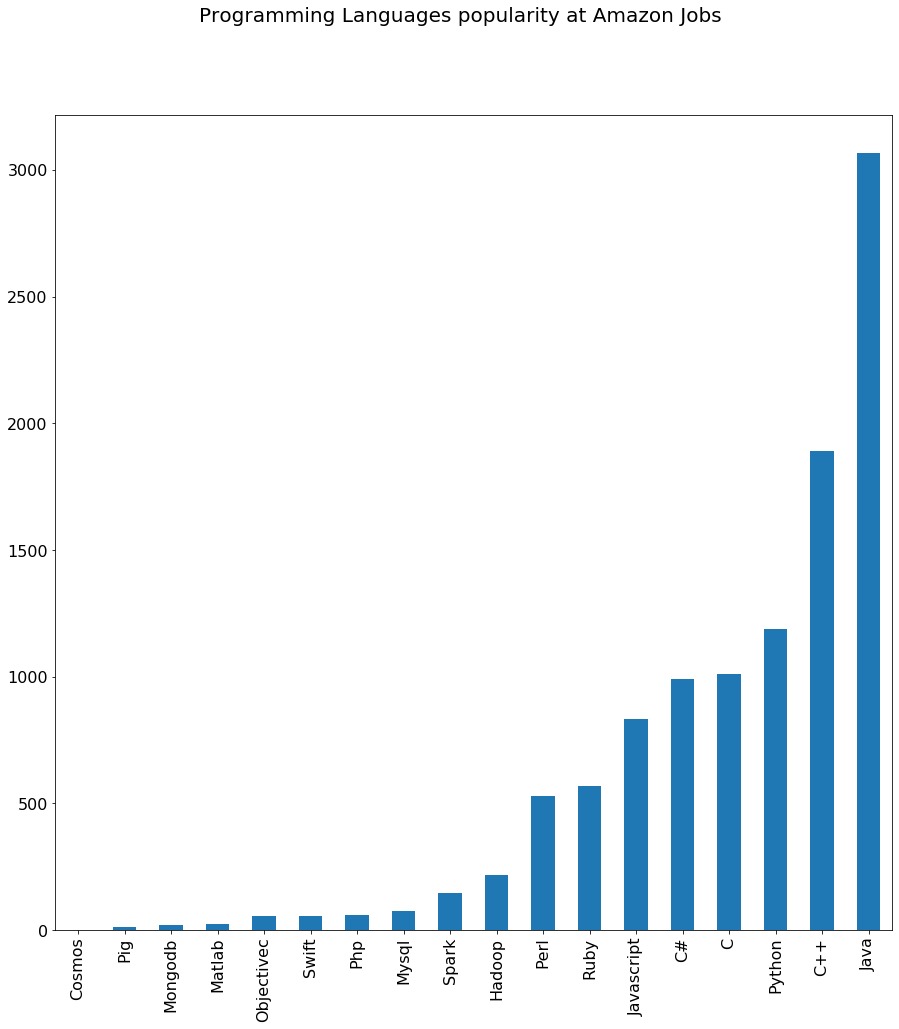

In [12]:
#2nd Question
df_popular_programming_lang.plot.bar(x='Language',y='Popularity',figsize=(15,15), legend=False)
plt.suptitle("Programming Languages popularity at Amazon Jobs", fontsize=20)
plt.xlabel("")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

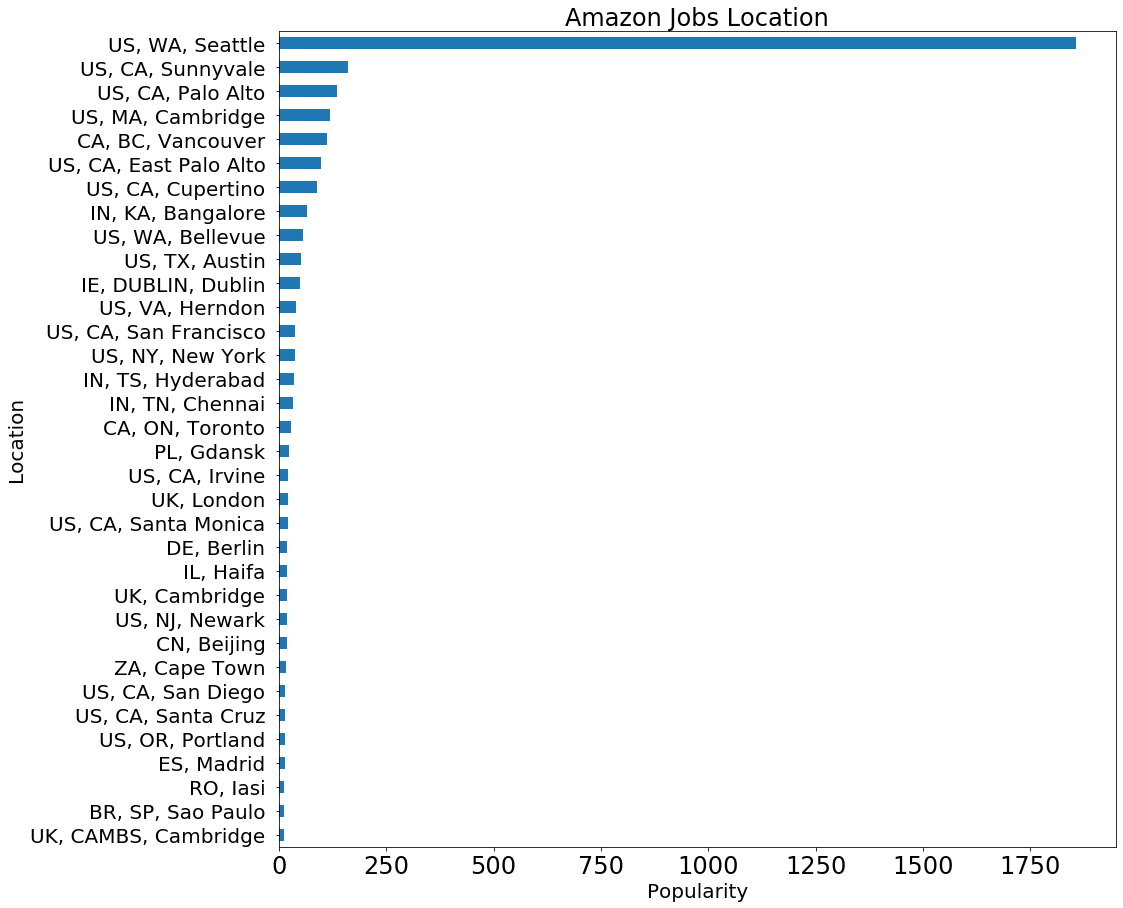

In [14]:
# 3rd Question
threshold = 10
location_value_counts = df_job_description.location.value_counts()
to_remove = location_value_counts[location_value_counts <= threshold].index
df_job_description['location'].replace(to_remove, np.nan, inplace=True)
location_value_counts = df_job_description.location.value_counts()
location_value_counts = location_value_counts[::-1]
location_value_counts.plot.barh(figsize=(15, 15))
# adding a suptitle
plt.title("Amazon Jobs Location", fontsize=24)
#xlabel = ""
plt.xlabel("Popularity", fontsize=20)
plt.ylabel("Location",fontsize=20)
#xticks fontsize -->14
plt.xticks(fontsize=24)
plt.yticks(fontsize=20)
#displaying the plot
plt.show()

In [16]:
#4th Question
basic_qualifications_string = "".join(re.sub('[·,-/’()]', '', str(v)) for v in qualifications)
degree_list = ["BA", "BS", "Bachelor's", "PhD","MS","Master's"]
wordcount = dict((x,0) for x in degree_list)
for w in re.findall(r"[\w']+|[.,!?;’]", basic_qualifications_string):
    if w in wordcount:
        wordcount[w] += 1
#printing
print(wordcount)
degree_wanted = sorted(wordcount.items(), key=lambda kv: kv[1], reverse=True)
df_degree_popular = pd.DataFrame(degree_wanted,columns=['Degree','Popularity'])

df_degree_popular

{'BA': 2, 'BS': 524, "Bachelor's": 947, 'PhD': 489, 'MS': 433, "Master's": 417}


,Degree,Popularity
0,Bachelor's,947
1,BS,524
2,PhD,489
3,MS,433
4,Master's,417
5,BA,2


In [17]:
num=list([('Bachelor of Science',1471),('Master of Science',850),('PhD',489),('BA',2)])
df_degree_popular = pd.DataFrame(num,columns=['Degree','Popularity'])
df_degree_popular

,Degree,Popularity
0,Bachelor of Science,1471
1,Master of Science,850
2,PhD,489
3,BA,2


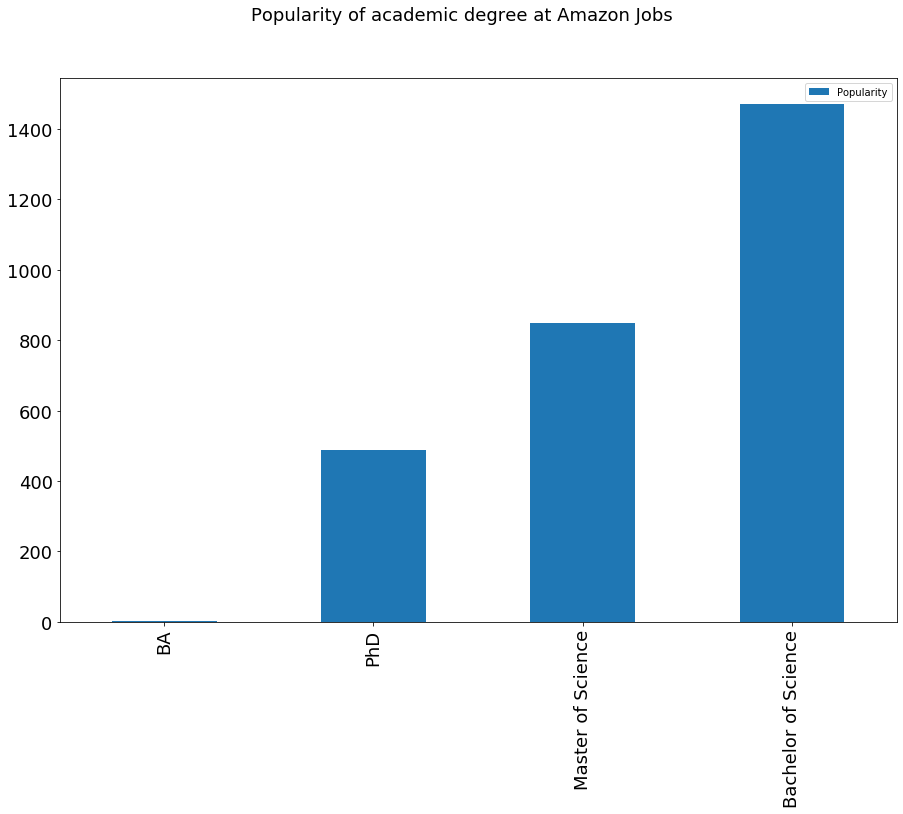

In [18]:
df_degree_popular = df_degree_popular[::-1] 
# plot
df_degree_popular.plot.bar(x='Degree',y='Popularity',figsize=(15,10), stacked=True)
# add suptitle
plt.suptitle("Popularity of academic degree at Amazon Jobs ", fontsize=18)
#xlabel to ""
plt.xlabel("")

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#displaying the plot
plt.show()